## Рынок заведений общественного питания Москвы

### Описание проекта
Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
Вы — гуру аналитики, и партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

### Инструкция по выполнению проекта

Загрузите данные и подготовьте их к анализу
1. [Загрузите данные о заведениях общественного питания Москвы. Убедитесь, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. При необходимости обработайте их.](#first-bullet)

Анализ данных
1. [Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.](#1-bullet)
2. [Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.](#2-bullet)
3. [Для какого вида объекта общественного питания характерно сетевое распространение? ](#3-bullet)
4. [Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#4-bullet)
5. [Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.](#5-bullet)
6. [Выделите в отдельный столбец информацию об улице из столбца address.](#6-bullet)
7. [Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#7-bullet)
8. [Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#8-bullet)
9. [Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?](#9-bullet) 


Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.

3. Подготовка презентации
Подготовьте презентацию исследования для инвесторов. Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно обязательно в формате pdf. Приложите ссылку на презентацию в markdown-ячейке в формате:

Презентация: <ссылка на облачное хранилище с презентацией>

Следуйте принципам оформления из темы «Подготовка презентации».
Оформление: Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.

Описание данных
* Таблица rest_data:
* id — идентификатор объекта;
* object_name — название объекта общественного питания;
* chain — сетевой ресторан;
* object_type — тип объекта общественного питания;
* address — адрес;
* number — количество посадочных мест.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Молодец, что кратко описал проект и добавил содержание со ссылками.
</div>

### Загрузите данные о заведениях общественного питания Москвы. Убедитесь, что тип данных в каждой колонке — правильный, а также отсутствуют пропущенные значения и дубликаты. При необходимости обработайте их.<a id="(#first-bullet)"></a>   
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from numpy import median
import seaborn as sb
from plotly import graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'

In [2]:
data = pd.read_csv('/datasets/rest_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [4]:
data.describe()

id        number
count   15366.000000  15366.000000
mean   119720.066901     59.547182
std     73036.130732     74.736833
min       838.000000      0.000000
25%     28524.000000     12.000000
50%    144974.500000     40.000000
75%    184262.250000     80.000000
max    223439.000000   1700.000000

In [5]:
data.query('number==1700')

id           object_name chain object_type  \
12723  199696  Arena by Soho Family   нет         бар   

                                                 address  number  
12723  город Москва, Кутузовский проспект, дом 36, ст...    1700

https://sova.ponominalu.ru/industry/sovety-i-pravila/arena-by-soho-family/ сайтутверждает что вместимость 6-6,5 к зрителей, так что сделаем вид что все ок

In [6]:
data.duplicated().sum()

0

In [7]:
columns=['object_name', 'chain', 'object_type', 'address']
for column in columns:
    data[column] = data[column].str.lower()

In [8]:
data.head()

id             object_name chain object_type  \
0  151635                 сметана   нет        кафе   
1   77874                  родник   нет        кафе   
2   24309         кафе «академия»   нет        кафе   
3   21894              пиццетория    да        кафе   
4  119365  кафе «вишневая метель»   нет        кафе   

                                             address  number  
0         город москва, улица егора абакумова, дом 9      48  
1  город москва, улица талалихина, дом 2/1, корпус 1      35  
2          город москва, абельмановская улица, дом 6      95  
3            город москва, абрамцевская улица, дом 1      40  
4  город москва, абрамцевская улица, дом 9, корпус 1      50

In [9]:
def logical(x):
    if x=='да':
        return True
    elif x == 'нет':
        return False
data['chain'] = data['chain'].apply(logical)

In [10]:
data.head()

id             object_name  chain object_type  \
0  151635                 сметана  False        кафе   
1   77874                  родник  False        кафе   
2   24309         кафе «академия»  False        кафе   
3   21894              пиццетория   True        кафе   
4  119365  кафе «вишневая метель»  False        кафе   

                                             address  number  
0         город москва, улица егора абакумова, дом 9      48  
1  город москва, улица талалихина, дом 2/1, корпус 1      35  
2          город москва, абельмановская улица, дом 6      95  
3            город москва, абрамцевская улица, дом 1      40  
4  город москва, абрамцевская улица, дом 9, корпус 1      50

посмотрели на данные (не обнаружили пропусков и других отклонений), заменили chain на более привычный вид 

### Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.<a id="(#1-bullet)"></a>   
</div>

In [11]:
fig = go.Figure(data=[go.Pie(labels=data['object_type'].value_counts().reset_index()['index'], values=data['object_type'].value_counts())])
fig.update_layout(
     title={
        'text':'Соотношение видов объектов общественного питания по количеству',
        'y':0.9,
        'x':0.38})
fig.show()


In [12]:
object_types = data.groupby('object_type', as_index=False).agg({'object_name':'count'}).sort_values(by='object_name', ascending=False)
object_types['percent'] = (object_types['object_name']/object_types['object_name'].sum()*100).round(1).astype('str') + '%'
fig = px.bar(object_types, y='object_name', x='object_type', text='object_name',color='object_type',  width=1000, height=500)
fig.update_xaxes(tickangle=45)
fig.update_layout(
    title='Соотношение видов объектов общественного питания по количеству',
    xaxis_title="Тип объекта",
    yaxis_title="Количество")
for trace, percent in zip(fig.data,object_types['percent']) :
    trace.name = trace.name.split('=')[1] + ' (' + percent+ ')'
fig.show()


Как мы видим лидерером являются кафе, затем столовые, потом рестораны и предприятии быстрого обслкживания, замыкают список закусочные и магазины с отделом кулинарии

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отличные графики :)
    
Подумай, пожалуйста, с чем может быть связано преобладание кафе?
</div>

думаю что все очень просто - открытие кафе сделать более просто например по сравнению с рестораном (т.к. у ресторан должен обеспечить полную термическую обработку блюда с начала готовки до конечного результата, т.е. недопускаются полуфабрикаты, а также нельзя ворваться "с одним шашлыком в меню" в ресторанный бизнес), а по примеру со столовой - то у населения более распространено кафе

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Да, всё верно :)
</div>

### Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график. <a id="(#2-bullet)"></a>   
</div>

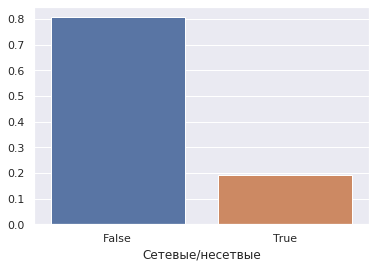

In [13]:
sb.set()
chains = data.groupby('chain')['id'].count().reset_index().rename(columns={'id':'counts'})
chains['ratio'] = chains['counts'] / chains['counts'].sum()
sb.barplot(x='chain',y='ratio', data=chains)
plt.xlabel('Сетевые/несетвые')
plt.ylabel('')
plt.show()

достаточно много несетевых заведений - 80,7%

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Как Ты думаешь почему преобладают несетевые заведения?
</div>

думаю что не у всех хватает ресурсов содержать сеть - денег, времени и т.д.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Ты верно ответил, что возможно не хватает ресурсов - для открытия сети их требуется намного больше.
</div>

### Для какого вида объекта общественного питания характерно сетевое распространение? <a id="(#3-bullet)"></a>   
</div>

In [14]:
object_chain = (data
                .groupby(['object_type','chain'])['id'].count()
                .reset_index()
                .rename(columns={'id':'counts'})
                .merge(data.groupby('object_type').chain.count(), on='object_type',suffixes=('','_total'))
               )

In [15]:
object_chain['ratio_percent'] = round((object_chain.counts / object_chain.chain_total) * 100)
object_chain

object_type  chain  counts  chain_total  \
0                                 бар  False     819          856   
1                                 бар   True      37          856   
2                               буфет  False     574          585   
3                               буфет   True      11          585   
4                          закусочная  False     304          360   
5                          закусочная   True      56          360   
6                                кафе  False    4703         6099   
7                                кафе   True    1396         6099   
8                           кафетерий  False     346          398   
9                           кафетерий   True      52          398   
10          магазин (отдел кулинарии)  False     195          273   
11          магазин (отдел кулинарии)   True      78          273   
12  предприятие быстрого обслуживания  False    1132         1923   
13  предприятие быстрого обслуживания   True     791         1923   
14                           ресторан  False    1741         2285   
15                           ресторан   True     544         2285   
16                           столовая  False    2584         2587   
17                           столовая   True       3         2587   

    ratio_percent  
0            96.0  
1             4.0  
2            98.0  
3             2.0  
4            84.0  
5            16.0  
6            77.0  
7            23.0  
8            87.0  
9            13.0  
10           71.0  
11           29.0  
12           59.0  
13           41.0  
14           76.0  
15           24.0  
16          100.0  
17            0.0

In [16]:
fig = px.bar(object_chain, x='object_type', y='counts', color='object_type')
fig.update_xaxes(tickangle=45)
fig.show()

Видно что предприятия быстрого обслуживания - лидеры, кафе на втором месте, вообще нет сетевого обслуживания у столовых

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отличный анализ, а как Ты думаешь с чем связано отсутствие сетевых столовых?
</div>

Ахах) ответа на этот вопрос у меня нет - но не думаю что какая-то сложная причина в этом 

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
На самом деле причина в том, что  столовые как правило существуют при организациях (заводах, театрах, университетах и т. д.) поэтому сетевыми быть не могут.
</div>

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест? <a id="(#4-bullet)"></a>   
</div>

In [17]:
chain = data.groupby('object_type').agg({'number':'mean','id':'count'}).reset_index().rename(columns={'id':'counts'})
chain['ratio'] = chain.number / chain.counts 
chain = chain.sort_values(by='ratio', ascending=False)
fig = px.bar(chain.query('object_type in ["кафе","ресторан","предприятие быстрого обслуживания", "магазин (отдел кулинарии)", "столовая", "бар"]'), x='object_type', y='ratio',color='object_type', title='Отношение среднего числа мест к количеству заведений')
fig.update_xaxes(title='')
fig.update_layout(
    autosize=False,
    width=700,
    height=400)
fig.show()

In [18]:
chain.query('object_type in ["кафе","ресторан","предприятие быстрого обслуживания", "магазин (отдел кулинарии)", "столовая", "бар"]')

object_type      number  counts     ratio
0                                бар   43.494159     856  0.050811
8                           столовая  130.246618    2587  0.050347
7                           ресторан   96.834136    2285  0.042378
5          магазин (отдел кулинарии)    5.589744     273  0.020475
6  предприятие быстрого обслуживания   20.552262    1923  0.010688
3                               кафе   39.716019    6099  0.006512

бары и столовые с ресторанами берут большим количеством мест, а остальные заведения берут количеством точек

### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.<a id="(#5-bullet)"></a>   
</div>

In [19]:
fig = px.bar(chain.sort_values(by='number'), x='object_type', y='number',color='object_type', title='Среднее число посадочных мест по типам заведений')
fig.update_yaxes(title='среднее число мест')
fig.show()

столовые и рестораны расчитаны на большее количество мест

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 1:
    
Проанализируй, пожалуйста, среднее число посадочных мест более детально.
</div>

### Выделите в отдельный столбец информацию об улице из столбца address.<a id="(#6-bullet)"></a>   
</div>

In [20]:
streets = data['address'].to_list()

In [21]:
streets_only = []
for street in streets:  
    start = street.find('город москва')
    end = street.find('дом')
    streets_only.append(street[start+14:end])

In [22]:
data['street_name'] = streets_only

In [23]:
data

id             object_name  chain object_type  \
0      151635                 сметана  False        кафе   
1       77874                  родник  False        кафе   
2       24309         кафе «академия»  False        кафе   
3       21894              пиццетория   True        кафе   
4      119365  кафе «вишневая метель»  False        кафе   
...       ...                     ...    ...         ...   
15361  208537             шоколадница   True        кафе   
15362  209264             шоколадница   True        кафе   
15363  209186             шоколадница   True        кафе   
15364  221900             шоколадница   True        кафе   
15365  222535             шоколадница   True        кафе   

                                                 address  number  \
0             город москва, улица егора абакумова, дом 9      48   
1      город москва, улица талалихина, дом 2/1, корпус 1      35   
2              город москва, абельмановская улица, дом 6      95   
3                город москва, абрамцевская улица, дом 1      40   
4      город москва, абрамцевская улица, дом 9, корпус 1      50   
...                                                  ...     ...   
15361       город москва, 3-й крутицкий переулок, дом 18      50   
15362           город москва, улица земляной вал, дом 33      10   
15363           город москва, улица земляной вал, дом 33      20   
15364  город москва, поселение московский, киевское ш...      36   
15365             город москва, ходынский бульвар, дом 4      10   

                                             street_name  
0                                улица егора абакумова,   
1                                     улица талалихина,   
2                                 абельмановская улица,   
3                                   абрамцевская улица,   
4                                   абрамцевская улица,   
...                                                  ...  
15361                           3-й крутицкий переулок,   
15362                               улица земляной вал,   
15363                               улица земляной вал,   
15364  поселение московский, киевское шоссе, 22-й кил...  
15365                                ходынский бульвар,   

[15366 rows x 7 columns]

### Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?<a id="(#7-bullet)"></a>   
</div>

In [24]:
import os
os.listdir()
cwd = os.getcwd()
cwd


'/home/user-0-818729446/work'

In [25]:
pip install -U pip setuptools

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ссылку на файл 
https://yadi.sk/i/fw0h1mS4WdI28w 


<div class="alert alert-block alert-success">
Комментарий ревьюера v. 3:
    
Ок :)
</div>

In [26]:
file = 'moscow.xlsx'
xl = pd.ExcelFile(file)
print(xl.sheet_names)
df1 = xl.parse('Sheet1')

['Sheet1']


In [27]:
#df1 = pd.read_excel('moscow.xlsx')

In [28]:
df1 = pd.read_csv('/home/user-0-818729446/work/moscow.csv')

таблица взята с сайта data.mos.ru

In [29]:
df1

Unnamed: 0                                            address  \
0                0  город москва, варшавское шоссе, дом 150, строе...   
1                1             город москва, косинская улица, дом 26а   
2                2         город москва, гороховский переулок, дом 21   
3                3  город москва, тагильская улица, дом 4, строени...   
4                4  город москва, ленинградский проспект, дом 73а,...   
...            ...                                                ...   
370773      370773  город москва, поселение новофедоровское, дерев...   
370774      370774  город москва, поселение щаповское, 1-й дунайск...   
370775      370775  город москва, город троицк, индустриальная ули...   
370776      370776  город москва, город троицк, индустриальная ули...   
370777      370777  город москва, город троицк, песчаная улица, до...   

                                  adm_area  \
0             южный административный округ   
1         восточный административный округ   
2       центральный административный округ   
3         восточный административный округ   
4          северный административный округ   
...                                    ...   
370773     троицкий административный округ   
370774     троицкий административный округ   
370775     троицкий административный округ   
370776     троицкий административный округ   
370777     троицкий административный округ   

                                   district             street_name  
0       муниципальный округ чертаново южное        варшавское шоссе  
1               муниципальный округ вешняки         косинская улица  
2             муниципальный округ басманный    гороховский переулок  
3          муниципальный округ метрогородок        тагильская улица  
4                 муниципальный округ сокол  ленинградский проспект  
...                                     ...                     ...  
370773            поселение новофедоровское        изумрудная улица  
370774                  поселение щаповское  1-й дунайский переулок  
370775               городской округ троицк    индустриальная улица  
370776               городской округ троицк    индустриальная улица  
370777               городской округ троицк          песчаная улица  

[370778 rows x 5 columns]

удалим что не надо

In [30]:
df1 = df1.drop(['Unnamed: 0', 'street_name'], axis=1)
df1

address  \
0       город москва, варшавское шоссе, дом 150, строе...   
1                  город москва, косинская улица, дом 26а   
2              город москва, гороховский переулок, дом 21   
3       город москва, тагильская улица, дом 4, строени...   
4       город москва, ленинградский проспект, дом 73а,...   
...                                                   ...   
370773  город москва, поселение новофедоровское, дерев...   
370774  город москва, поселение щаповское, 1-й дунайск...   
370775  город москва, город троицк, индустриальная ули...   
370776  город москва, город троицк, индустриальная ули...   
370777  город москва, город троицк, песчаная улица, до...   

                                  adm_area  \
0             южный административный округ   
1         восточный административный округ   
2       центральный административный округ   
3         восточный административный округ   
4          северный административный округ   
...                                    ...   
370773     троицкий административный округ   
370774     троицкий административный округ   
370775     троицкий административный округ   
370776     троицкий административный округ   
370777     троицкий административный округ   

                                   district  
0       муниципальный округ чертаново южное  
1               муниципальный округ вешняки  
2             муниципальный округ басманный  
3          муниципальный округ метрогородок  
4                 муниципальный округ сокол  
...                                     ...  
370773            поселение новофедоровское  
370774                  поселение щаповское  
370775               городской округ троицк  
370776               городской округ троицк  
370777               городской округ троицк  

[370778 rows x 3 columns]

In [31]:
data

id             object_name  chain object_type  \
0      151635                 сметана  False        кафе   
1       77874                  родник  False        кафе   
2       24309         кафе «академия»  False        кафе   
3       21894              пиццетория   True        кафе   
4      119365  кафе «вишневая метель»  False        кафе   
...       ...                     ...    ...         ...   
15361  208537             шоколадница   True        кафе   
15362  209264             шоколадница   True        кафе   
15363  209186             шоколадница   True        кафе   
15364  221900             шоколадница   True        кафе   
15365  222535             шоколадница   True        кафе   

                                                 address  number  \
0             город москва, улица егора абакумова, дом 9      48   
1      город москва, улица талалихина, дом 2/1, корпус 1      35   
2              город москва, абельмановская улица, дом 6      95   
3                город москва, абрамцевская улица, дом 1      40   
4      город москва, абрамцевская улица, дом 9, корпус 1      50   
...                                                  ...     ...   
15361       город москва, 3-й крутицкий переулок, дом 18      50   
15362           город москва, улица земляной вал, дом 33      10   
15363           город москва, улица земляной вал, дом 33      20   
15364  город москва, поселение московский, киевское ш...      36   
15365             город москва, ходынский бульвар, дом 4      10   

                                             street_name  
0                                улица егора абакумова,   
1                                     улица талалихина,   
2                                 абельмановская улица,   
3                                   абрамцевская улица,   
4                                   абрамцевская улица,   
...                                                  ...  
15361                           3-й крутицкий переулок,   
15362                               улица земляной вал,   
15363                               улица земляной вал,   
15364  поселение московский, киевское шоссе, 22-й кил...  
15365                                ходынский бульвар,   

[15366 rows x 7 columns]

In [32]:
data = data.merge(df1, on='address', how='inner')
data

id              object_name  chain object_type  \
0      151635                  сметана  False        кафе   
1       77874                   родник  False        кафе   
2       24309          кафе «академия»  False        кафе   
3       21894               пиццетория   True        кафе   
4      119365   кафе «вишневая метель»  False        кафе   
...       ...                      ...    ...         ...   
15269  222491  кальянная «мята lounge»   True        кафе   
15270  212216              мята lounge   True        кафе   
15271  206341              мята lounge   True        кафе   
15272  213772                   тануки   True    ресторан   
15273   74972              шоколадница   True        кафе   

                                                 address  number  \
0             город москва, улица егора абакумова, дом 9      48   
1      город москва, улица талалихина, дом 2/1, корпус 1      35   
2              город москва, абельмановская улица, дом 6      95   
3                город москва, абрамцевская улица, дом 1      40   
4      город москва, абрамцевская улица, дом 9, корпус 1      50   
...                                                  ...     ...   
15269  город москва, профсоюзная улица, дом 142, корп...      40   
15270             город москва, привольная улица, дом 11      56   
15271           город москва, салтыковская улица, дом 7г     100   
15272               город москва, осенний бульвар, дом 9      98   
15273            город москва, улица новый арбат, дом 13      30   

                   street_name                                 adm_area  \
0      улица егора абакумова,   северо-восточный административный округ   
1           улица талалихина,        центральный административный округ   
2       абельмановская улица,        центральный административный округ   
3         абрамцевская улица,   северо-восточный административный округ   
4         абрамцевская улица,   северо-восточный административный округ   
...                        ...                                      ...   
15269      профсоюзная улица,       юго-западный административный округ   
15270       привольная улица,      юго-восточный административный округ   
15271     салтыковская улица,          восточный административный округ   
15272        осенний бульвар,           западный административный округ   
15273      улица новый арбат,        центральный административный округ   

                                  district  
0          муниципальный округ ярославский  
1            муниципальный округ таганский  
2            муниципальный округ таганский  
3            муниципальный округ лианозово  
4            муниципальный округ лианозово  
...                                    ...  
15269      муниципальный округ теплый стан  
15270  муниципальный округ выхино-жулебино  
15271       муниципальный округ новокосино  
15272       муниципальный округ крылатское  
15273            муниципальный округ арбат  

[15274 rows x 9 columns]

теперь перейдем непосредственно к заданию, т.к. у нас появились районы в таблице

In [33]:
top_objects_count = (data
                     .groupby('street_name', as_index=False)
                     .agg({'id':'count', 'district':'max'})
                     .sort_values(by='id', ascending=False)
                     .rename(columns={'id':'id_count_top'})
                    )

In [34]:
temp = data.groupby('street_name').count().sort_values(by='object_type', ascending=False).head(10).reset_index()
top_10 = list(temp['street_name'])

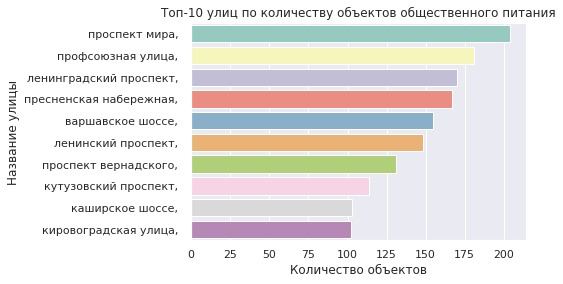

In [35]:
ax = sns.barplot(x='object_type', y='street_name', data=temp, palette="Set3")
ax.set_xlabel('Количество объектов')
ax.set_ylabel('Название улицы')
ax.set_title('Топ-10 улиц по количеству объектов общественного питания')
plt.show()

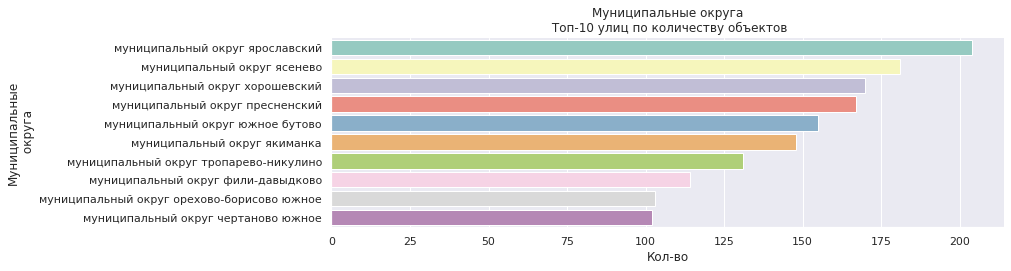

In [36]:
ax=sns.catplot(x='id_count_top', y='district', 
               kind='bar', data=top_objects_count.head(10), 
               palette='Set3',
                   height=3.5, aspect=4)
(ax
 .set_xticklabels(rotation=0)
 .set(title = 'Муниципальные округа\n Топ-10 улиц по количеству объектов')
 .set(ylabel = 'Муниципальные\n округа')
 .set(xlabel = 'Кол-во')
)

южное орехово-борисово и южное чертаново имеет самую низкую конкуренцию в общепите, нужно дополнительное исследование чем это обусловлено, можно сделать 2 гипотезы:
* Н0 - районы более привлекательны "для освоения общепита"
* Н1 - районы имеют более низкую платежоспособность, не выгодно с точки зрения комерциализации, др. проблемы

### Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?<a id="(#8-bullet)"></a>   
</div>

In [37]:
one_object = top_objects_count.query('id_count_top==1').count()[1]
one_object

802

802 улицы с 1 объектом 

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 1:
    
Как Ты думаешь с чем связано наличие только одного заведения на улицу?
</div>

возможно улица слишком "маленькая"

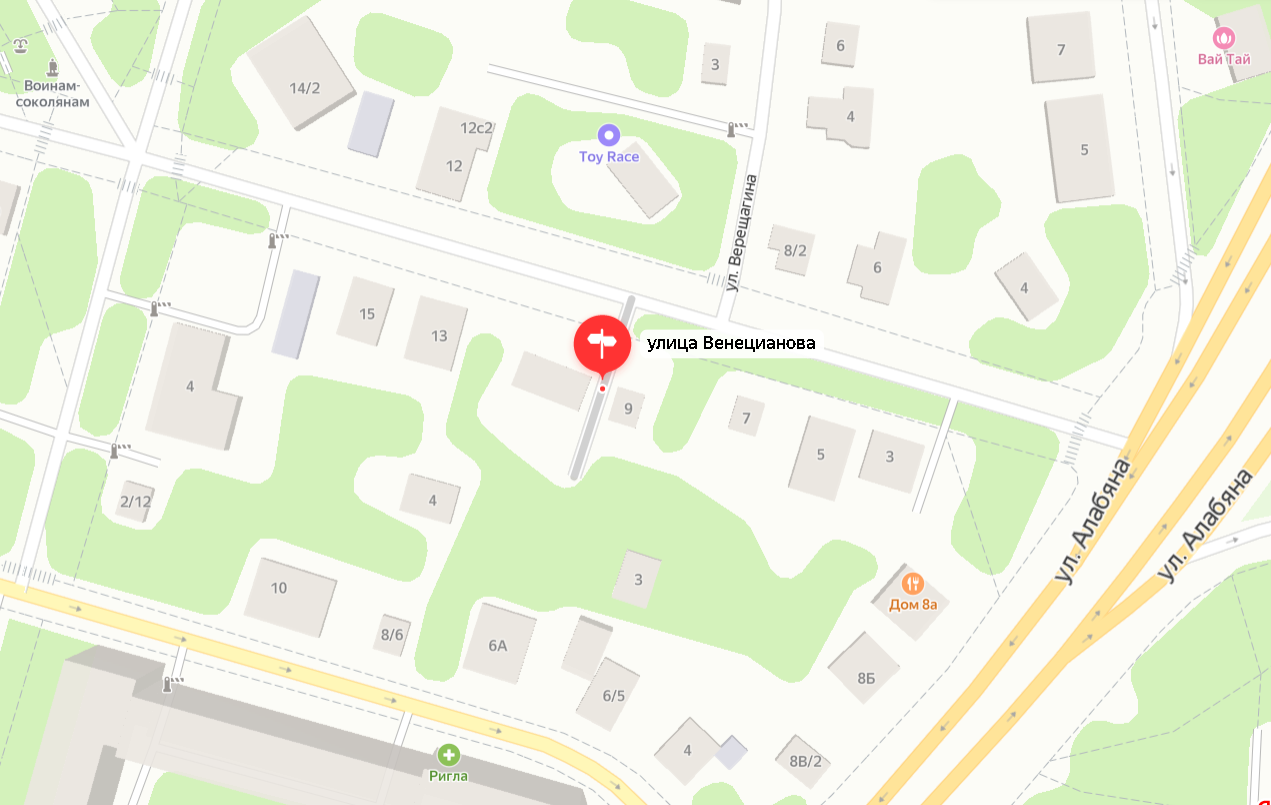

что-то в этом духе, протяженность, если верить открытым источникам, 48 метров

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Да, Ты прав, в большинстве случаев это связано с длиной этих улиц. Кстати, если Тебе интересно, то вот самые короткие улицы в мире: https://www.smithsonianmag.com/travel/top-ten-small-streets-worth-visiting-180954589/
</div>

In [38]:
one_object = top_objects_count.query('id_count_top==1')

In [39]:
one_object

street_name  id_count_top  \
1732                   улица брусилова,              1   
2044                    улица рословка,              1   
17          1-й кожевнический переулок,              1   
18              1-й кожуховский проезд,              1   
218                 6-й лучевой просек,              1   
...                                  ...           ...   
1394            производственная улица,              1   
1395                   прокатная улица,              1   
469            воротниковский переулок,              1   
1398  пролетарский проспект, владение 26             1   
2252                   яхромская улица,              1   

                              district  
1732  муниципальный округ южное бутово  
2044        муниципальный округ митино  
17     муниципальный округ даниловский  
18     муниципальный округ даниловский  
218     муниципальный округ сокольники  
...                                ...  
1394      муниципальный округ солнцево  
1395    муниципальный округ ивановское  
469       муниципальный округ тверской  
1398      муниципальный округ царицыно  
2252   муниципальный округ дмитровский  

[802 rows x 3 columns]

In [40]:
not_top_streets = one_object.groupby('street_name').agg({'id_count_top':'count', 'district':'max'}).reset_index().sort_values(by='id_count_top')
not_top_streets = not_top_streets[(not_top_streets['id_count_top']==1) & (not_top_streets['district'].isna()==False)]
not_top_streets

street_name  id_count_top  \
0                            1-й балтийский переулок,              1   
528   поселение щаповское, деревня овечкино, владение              1   
529            поселение щаповское, деревня шаганино,              1   
530  поселение щаповское, посёлок курилово, школьна...             1   
531  поселение щаповское, посёлок щапово, улица сад...             1   
..                                                 ...           ...   
271                  город щербинка, улица авиаторов,              1   
272  город щербинка, улица барышевская роща, владен...             1   
273                                  городская улица,              1   
263                   город троицк, пионерская улица,              1   
801                                  яхромская улица,              1   

                            district  
0       муниципальный округ аэропорт  
528              поселение щаповское  
529              поселение щаповское  
530              поселение щаповское  
531              поселение щаповское  
..                               ...  
271         городской округ щербинка  
272         городской округ щербинка  
273  муниципальный округ даниловский  
263           городской округ троицк  
801  муниципальный округ дмитровский  

[802 rows x 3 columns]

In [41]:
districts_one_place = not_top_streets.groupby('district')['id_count_top'].count().sort_values(ascending=False)
districts_one_place.head(15)

district
муниципальный округ таганский         29
муниципальный округ хамовники         27
муниципальный округ басманный         24
муниципальный округ пресненский       21
муниципальный округ тверской          20
муниципальный округ марьина роща      18
муниципальный округ сокольники        15
муниципальный округ крюково           14
муниципальный округ мещанский         14
муниципальное образование савелки     13
муниципальный округ матушкино         13
муниципальный округ южное бутово      13
муниципальный округ замоскворечье     13
муниципальный округ даниловский       12
муниципальный округ красносельский    12
Name: id_count_top, dtype: int64

в Таганском районе больше всего улиц всего с 1м заведением общепита, Хамовники и Басманный район на 2ом и 3ьем месте соответственно, возможно это связано с большим наличием "маленьких" улиц

### Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить? <a id="(#9-bullet)"></a>   
</div>

In [42]:
top_10_objects = top_objects_count.head(10)
top_10_objects = top_10_objects.drop(['district', 'id_count_top'], axis=1)

In [43]:
top_10_objects

street_name
1412           проспект мира, 
1416       профсоюзная улица, 
879   ленинградский проспект, 
1366  пресненская набережная, 
432         варшавское шоссе, 
883       ленинский проспект, 
1408    проспект вернадского, 
870     кутузовский проспект, 
787          каширское шоссе, 
797     кировоградская улица,

In [44]:
top_10_streets = top_10_objects.merge(data, on='street_name', how='left')

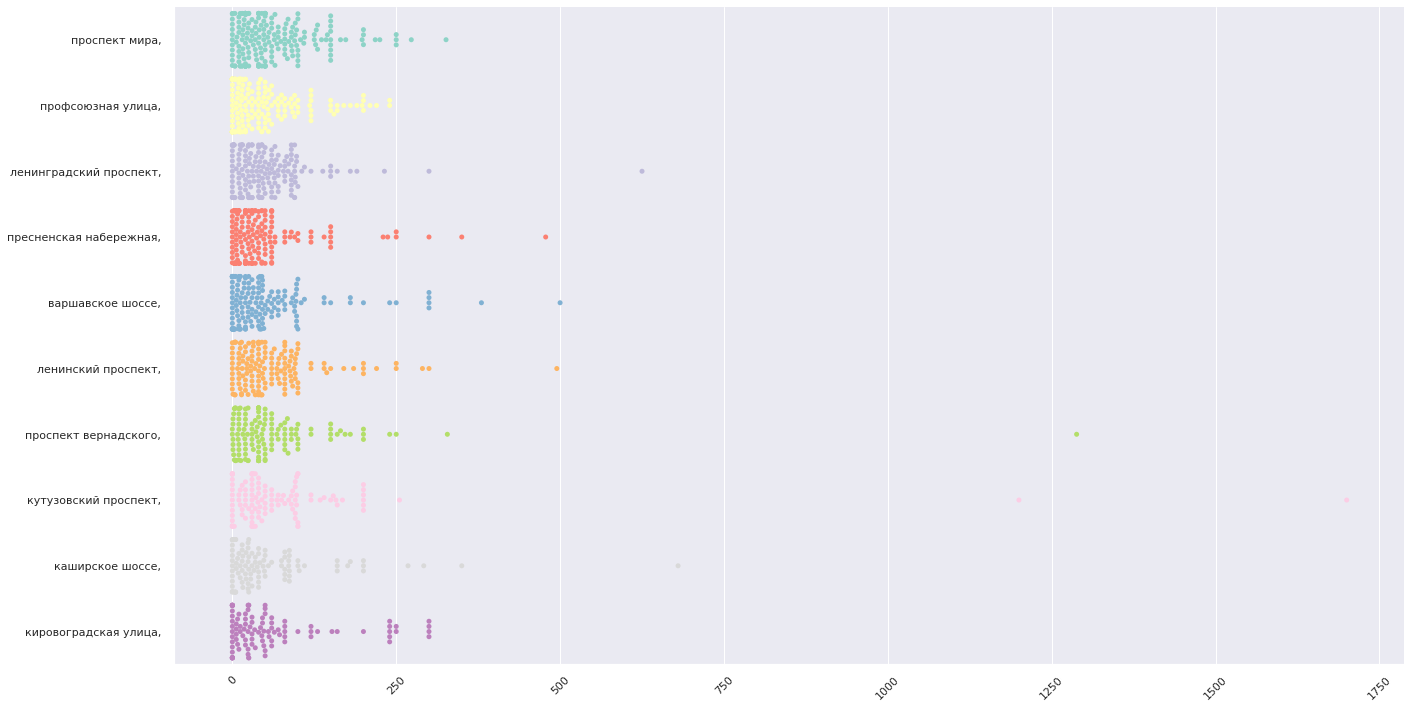

In [45]:
ax=sns.catplot(y='street_name', x='number', 
               kind='swarm', data=top_10_streets, 
                   palette='Set3', 
                   height=10, aspect=2)
(ax
 .set_xticklabels(rotation=45)
 .set(title = '')
 .set(ylabel = '')
 .set(xlabel = '')
)

In [46]:
top_10_streets.query('number >=300').count().sum()

216

216 объектов с посадочными местами более 300

In [47]:
top_10_streets.query('number >=200').count().sum()

720

720 объектов с посадочными местами более 200

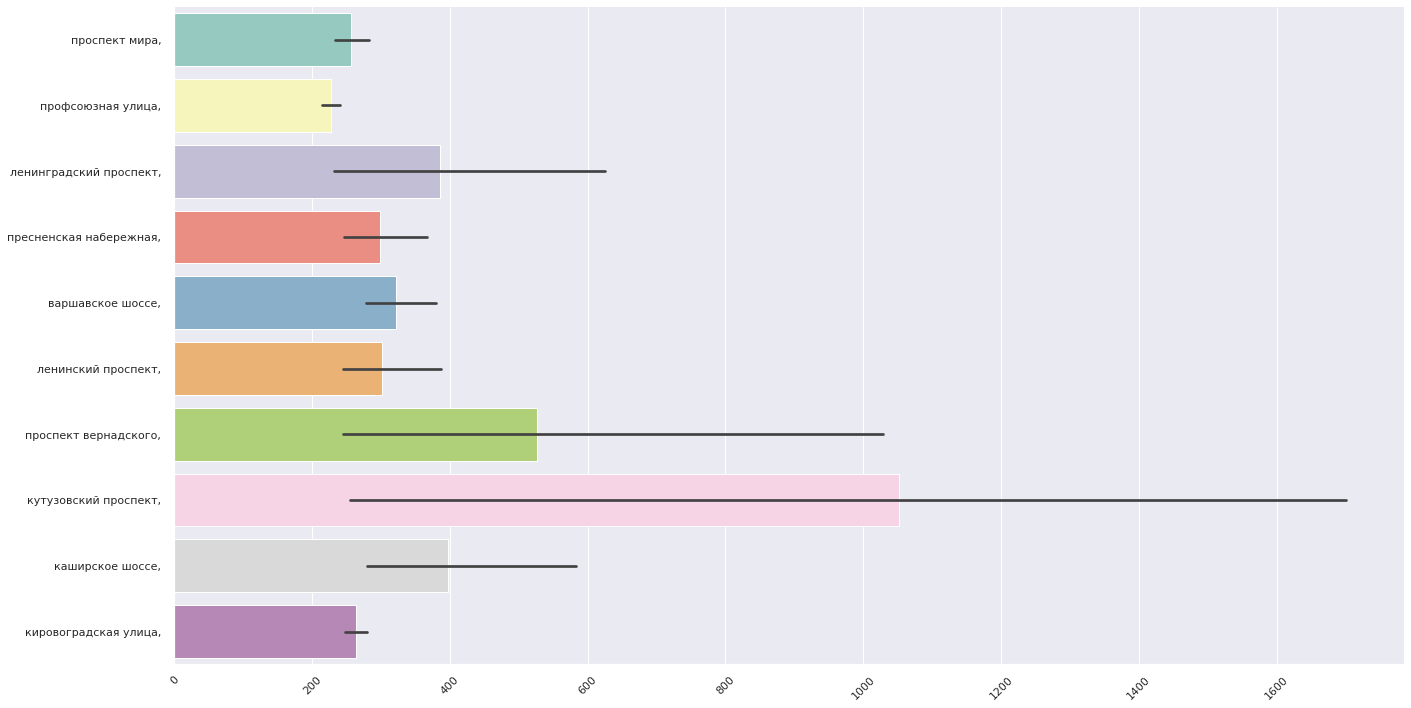

In [48]:
ax=sns.catplot(y='street_name', x='number', 
               kind='bar', data=top_10_streets.query('number>200'), 
                   palette='Set3', 
                   height=10, aspect=2)
(ax
 .set_xticklabels(rotation=45)
 .set(title = '')
 .set(ylabel = '')
 .set(xlabel = '')
)

* кутузовский проспект и проспект вернадского находятся около кремля, следовательно имеют огромный пешеходный трафик, тоже самое можно сказать о ленинградском проспекте
* каширское шоссе находится не так близко к кремлю, но по протяженности больше чем вышеперечисленные проспекты, возможно это выезд из города, поэтому более привлекателен для владельцев общепита

### Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.

Выводы:
* среди всех заведений общественного питания 40% кафе, 17% столовые, 15% рестораны, 12.5% предприятия быстрого обслуживани, 6% бары
* из всех заведений 80% являются несетевыми
* южное орехово-борисово и южное чертаново имеет самую низкую конкуренцию в общепите
* в Таганском районе, районе Хамовники и Басманном районе больше всего улиц всего с 1м заведением общепита

Рекомендации для бизнеса:
* если открывать точки общепита в привлекательных районах города надо учитывать большую конкуренцию
* провести дополнительное исследование гипотез для "малозаполненных" районов Москвы:
    * Н0 - районы более привлекательны "для освоения общепита"
    * Н1 - районы имеют более низкую платежоспособность, не выгодно с точки зрения комерциализации, др. проблемы

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отличные рекомендации :)
</div>

https://docs.google.com/presentation/d/1WpUvPori5cE71pJ1SpUCIte5klBTnuLekEsv3X3TPhg/edit?usp=sharing ссылка на презентацию 

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 2:
    
Отличная презентация, но нужно добавить слайд с постановкой задачи/проблемы и перенести выводы в конец слайда. Кроме того, нужно добавить последний слайд "Спасибо за внимание!" или что-то похожее.
</div>

добавил

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Отлично :)
</div>